In [29]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

In [30]:
path = os.getcwd()
abspath = os.path.abspath(os.path.join(path, os.pardir))

In [38]:
pathImageFolder = abspath + '/imagesV2'                             
folderList = os.listdir(pathImageFolder)

In [4]:
imagesCropV3 = abspath + '/imagesCropV3'

if not os.path.exists(imagesCropV3):
            os.mkdir(imagesCropV3)

In [5]:
face_model = cv2.CascadeClassifier(f'{abspath}/odm_MASKS/input/haarcascades/haarcascade_frontalface_default.xml')

AngelaMerkel


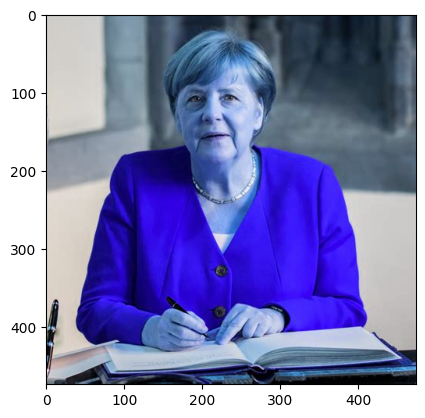

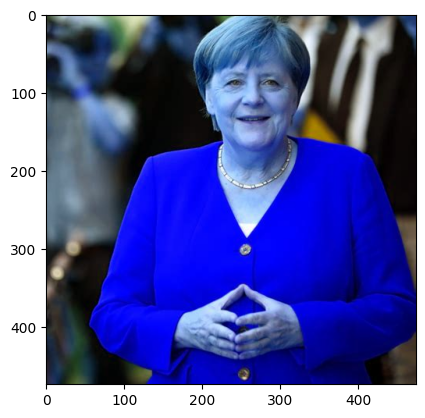

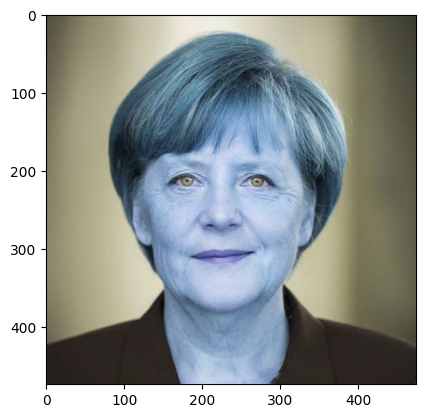

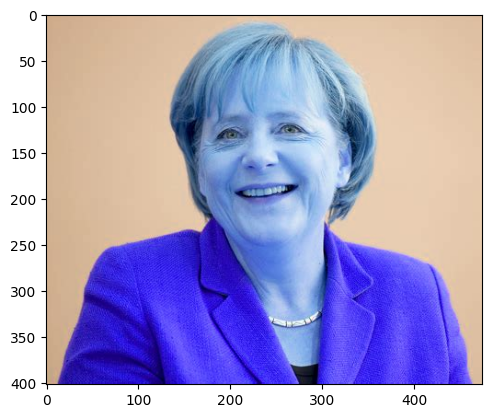

error: OpenCV(4.5.5) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [131]:
for folder in folderList:
   
    pathFolder = pathImageFolder + '/' + folder 
    imageFolder = pathFolder + '/images/'
    
    myFiles = [f for f in os.listdir(imageFolder) if f.endswith('.jpg')]
    
    print(folder)
    
    path = imagesCropV3 + '/' + folder
    if not os.path.exists(path):
            os.mkdir(path)
    
    for file in range(len(myFiles)):
        
        file_name = myFiles[file]
        try:
            #crop
            img = cv2.imread(imageFolder + file_name)
            img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
            
            plt.imshow(img)
            
            faces = face_model.detectMultiScale(img, scaleFactor=1.1, minNeighbors=20)
            
            out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                        
            for (x,y,w,h) in faces:
                #i = cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
                
                out_img = out_img[y:y+h,x:x+w]
                
                #plt.imshow(out_img)
                plt.show()
            
                cv2.imwrite(path + '/' + file_name, out_img)
        except ValueError:
            print(ValueError)
            print(file_name)

In [17]:
!pip install deepface
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
!pip install cmake
!pip install dlib

In [22]:
original = '/tf/src/imagesUnknown/imagesUnknownOriginal/'
cropped = '/tf/src/imagesUnknown/imagesUnknownCropped/'

In [23]:
myFiles = [f for f in os.listdir(original) if f.endswith('.jpg')]
    
for file in range(len(myFiles)):
        
    file_name = myFiles[file]
    try:
        face = DeepFace.detectFace(img_path = original + file_name, target_size = (224, 224), detector_backend = "dlib")
        plt.imsave(cropped + file_name, face)
    except ValueError:
        print(ValueError)
        print(file_name)

<class 'ValueError'>
real_00018.jpg
<class 'ValueError'>
real_00029.jpg
<class 'ValueError'>
real_00034.jpg
<class 'ValueError'>
real_00047.jpg
<class 'ValueError'>
real_00057.jpg
<class 'ValueError'>
real_00083.jpg
<class 'ValueError'>
real_00089.jpg
<class 'ValueError'>
real_00091.jpg
<class 'ValueError'>
real_00097.jpg
<class 'ValueError'>
real_00103.jpg
<class 'ValueError'>
real_00106.jpg
<class 'ValueError'>
real_00118.jpg
<class 'ValueError'>
real_00121.jpg
<class 'ValueError'>
real_00162.jpg
<class 'ValueError'>
real_00187.jpg
<class 'ValueError'>
real_00191.jpg
<class 'ValueError'>
real_00198.jpg
<class 'ValueError'>
real_00219.jpg
<class 'ValueError'>
real_00222.jpg
<class 'ValueError'>
real_00224.jpg
<class 'ValueError'>
real_00250.jpg
<class 'ValueError'>
real_00253.jpg
<class 'ValueError'>
real_00314.jpg
<class 'ValueError'>
real_00319.jpg
<class 'ValueError'>
real_00326.jpg
<class 'ValueError'>
real_00338.jpg
<class 'ValueError'>
real_00341.jpg
<class 'ValueError'>
real_00

In [37]:
dir_list = os.listdir(pathImageFolder)
print(len(dir_list))

FileNotFoundError: [Errno 2] No such file or directory: '/tf/src/imagesV3'

In [46]:
import shutil
import numpy as np
import random

In [40]:
dataset = f'{abspath}/datasetV3' 
if not os.path.exists(dataset):
    print(dataset)
    os.mkdir(dataset)
    os.mkdir(f'{dataset}/train')
    os.mkdir(f'{dataset}/val')
    os.mkdir(f'{dataset}/test')

['home', 'srv', 'etc', 'opt', 'root', 'lib', 'mnt', 'usr', 'media', 'lib64', 'sys', 'dev', 'sbin', 'boot', 'bin', 'run', 'lib32', 'libx32', 'proc', 'tmp', 'var', 'tf', '.dockerenv', '.local', 'NGC-DL-CONTAINER-LICENSE']


In [60]:
for folder in folderList:
    print(folder)
    pathFolder = pathImageFolder + '/' + folder 
    imageFolder = pathFolder + '/crop/'
    #labelFolder = pathFolder + '/labels/' 
    myFiles = [f for f in os.listdir(imageFolder) if f.endswith('.jpg')]
    random.shuffle(myFiles)
    
    for i, file in enumerate(myFiles):
        if(i <= int(len(myFiles) * 0.7)):
            if not os.path.exists(f'{dataset}/train/{folder}'):
                os.mkdir(f'{dataset}/train/{folder}')
            shutil.copy(f'{imageFolder}/{file}', f'{dataset}/train/{folder}/{file}')
            #shutil.copy(f'{labelFolder}/{file.replace("jpg", "xml")}', f'{dataset}/train')
        elif(i > int(len(myFiles) * 0.7) and i <= int(len(myFiles) * 0.85)):
            if not os.path.exists(f'{dataset}/val/{folder}'):
                os.mkdir(f'{dataset}/val/{folder}')
            shutil.copy(f'{imageFolder}/{file}', f'{dataset}/val/{folder}/{file}')
            #shutil.copy(f'{labelFolder}/{file.replace("jpg", "xml")}', f'{dataset}/val')
        else:
            if not os.path.exists(f'{dataset}/test/{folder}'):
                os.mkdir(f'{dataset}/test/{folder}')
            shutil.copy(f'{imageFolder}/{file}', f'{dataset}/test/{folder}/{file}')
            #shutil.copy(f'{labelFolder}/{file.replace("jpg", "xml")}', f'{dataset}/test')


AngelaMerkel
AnnalenaBaerbock
AnthonyFauci
ArnoldSchwarzenegger
BarackObama
BenedictCumberbatch
BradPitt
ChadwickBoseman
ChrisHemsworth
ChrisPratt
ChristianBale
ChristianLindner
CristianoRonaldo
DenzelWashington
DonaldTrump
DwayneJohnson
EdSheeran
ElonMusk
ElyasM'barek
GeorgeClooney
GüntherJauch
HeidiKlum
HeleneFischer
JasonMomoa
JeffBezos
JoeBiden
JudithRakers
KarlLauterbach
KobeBryant
LeBronJames
LeonardoDiCaprio
LewisHamilton
LionelMessi
MacKenzieScott
ManuelNeuer
MaxVerstappen
MichaelJackson
MichaelJordan
MorganFreeman
NovakDjokovic
OlafScholz
RafaelNadal
RobertDowneyJr
RogerFederer
SebastianVettel
ShaquilleO'Neal
StefanRaab
SylvesterStallone
TomCruise
TomHanks
TomHardy
TomHiddleston
VinDiesel
WillSmith
WladimirPutin
XiJinping


In [41]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rows=160  #Number of Pixels in the Rows for Input. 
cols=160  #Number of Pixels in Columns for Output

In [42]:
trained_model=MobileNetV2(input_shape=(rows,cols,3),           
                    include_top=False,
                    weights='imagenet')   


trained_model.trainable=True  #Un-Freeze all the pretrained layers of 'MobileNetV2 for Training.
    
trained_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [43]:
last_layer=trained_model.get_layer('out_relu')   
last_layer_output=last_layer.output  

In [44]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.1,
                                height_shift_range=0.1)
                                 
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(f'{dataset}/train',
                                                  target_size=(rows,cols),
                                                  class_mode='categorical')

test_generator=test_datagen.flow_from_directory(f'{dataset}/test',
                                                target_size=(rows,cols),
                                                class_mode='categorical')

Found 14057 images belonging to 57 classes.
Found 2523 images belonging to 57 classes.


In [47]:
x = tf.keras.layers.GlobalAveragePooling2D()(last_layer_output)
#Add a Dropout layer.
x = tf.keras.layers.Dropout(0.2)(x)                      
# Add a final softmax layer for classification.
x = tf.keras.layers.Dense(57,activation='softmax')(x)


# todo inject labels?
# https://stackoverflow.com/questions/44310448/attaching-class-labels-to-a-keras-model

model = tf.keras.Model(trained_model.input,x) 

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
#Summary of the model.
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']         

In [49]:
result=model.fit(train_generator,
                 validation_data=test_generator,
                 epochs=10,
                 verbose=1)

Epoch 1/10
440/440 [==============================] - 73s 165ms/step - loss: 0.1654 - accuracy: 0.9529 - val_loss: 0.4085 - val_accuracy: 0.8938
Epoch 2/10
440/440 [==============================] - 73s 166ms/step - loss: 0.1397 - accuracy: 0.9634 - val_loss: 0.5041 - val_accuracy: 0.8696
Epoch 3/10
440/440 [==============================] - 73s 166ms/step - loss: 0.1200 - accuracy: 0.9661 - val_loss: 0.5373 - val_accuracy: 0.8609
Epoch 4/10
440/440 [==============================] - 73s 165ms/step - loss: 0.1205 - accuracy: 0.9655 - val_loss: 0.5964 - val_accuracy: 0.8462
Epoch 5/10
440/440 [==============================] - 72s 164ms/step - loss: 0.1074 - accuracy: 0.9682 - val_loss: 0.5477 - val_accuracy: 0.8656
Epoch 6/10
440/440 [==============================] - 72s 164ms/step - loss: 0.0890 - accuracy: 0.9738 - val_loss: 0.4824 - val_accuracy: 0.8803
Epoch 7/10
440/440 [==============================] - 72s 163ms/step - loss: 0.0924 - accuracy: 0.9738 - val_loss: 0.4888 - val_ac

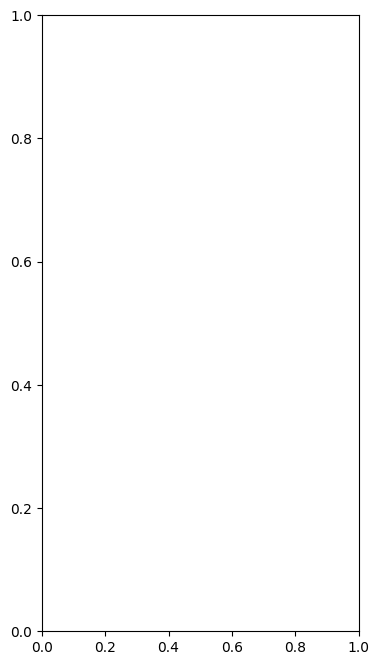

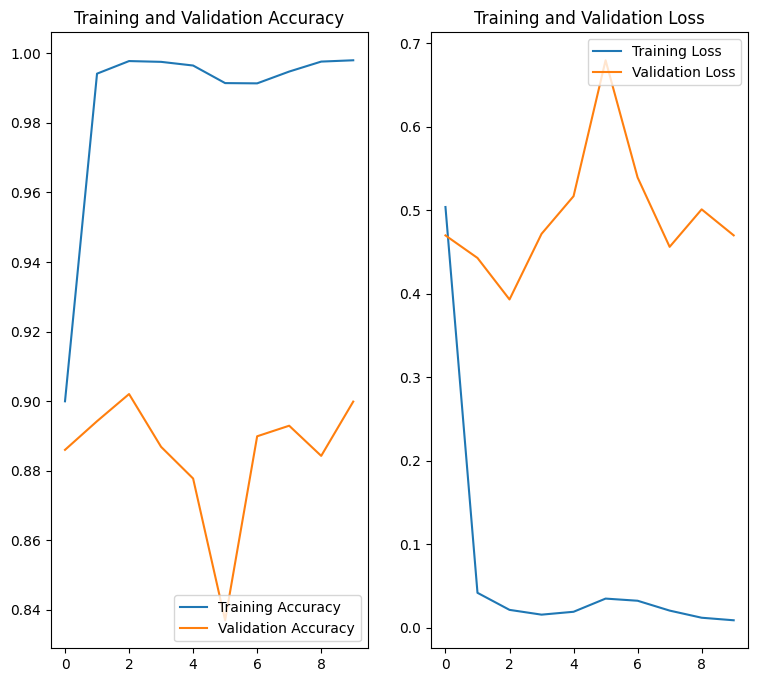

In [159]:
import matplotlib.pyplot as plt

acc = result.history['accuracy']
val_acc = result.history['val_accuracy']

loss = result.history['loss']
val_loss = result.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(9, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
model.save(f'{abspath}/models/classification/newClass/v3/')

In [51]:
model.evaluate(test_generator)

79/79 [==============================] - 6s 71ms/step - loss: 0.6645 - accuracy: 0.8545


[0.6644719839096069, 0.8545382618904114]

In [112]:
img_path = ("/tf/src/imagesV2/RafaelNadal/crop/004_9537a844.jpg")


# dimensions of our images
img_width, img_height = 224, 224

# predicting images
img = image.load_img(img_path, target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)

predicted_class_indices=np.argmax(classes,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

print(labels)
print(predictions)

[[2.8647168e-02 2.2618828e-04 2.3855409e-04 5.6709629e-03 4.6929240e-04
  3.4425102e-04 1.1038606e-03 2.5374959e-03 1.4069297e-03 9.8933146e-05
  1.4105772e-04 6.5894949e-04 8.6800763e-05 5.0319573e-05 4.3934453e-03
  1.4452777e-04 3.6188710e-01 2.8978544e-04 1.0132772e-05 1.1402197e-04
  1.0283771e-04 3.1248519e-01 2.6706117e-03 3.6125777e-03 4.9277321e-03
  6.8752241e-04 5.2586285e-04 6.8328151e-04 6.2154926e-05 4.6094728e-04
  8.3759209e-05 5.3862423e-05 3.6341551e-04 1.7925978e-02 1.6206770e-05
  5.6635635e-04 1.7560700e-02 9.7205897e-04 2.0329712e-01 2.1367145e-05
  1.6655022e-05 1.9867008e-03 1.2152505e-03 2.9938967e-06 2.2662907e-05
  7.3438431e-03 3.4039484e-05 2.9616509e-04 1.4308167e-05 1.7276806e-03
  6.4413442e-05 1.0365675e-02 3.9368088e-04 1.0167194e-05 4.9417652e-04
  4.1233661e-04]]
{0: 'AngelaMerkel', 1: 'AnnalenaBaerbock', 2: 'AnthonyFauci', 3: 'ArnoldSchwarzenegger', 4: 'BarackObama', 5: 'BenedictCumberbatch', 6: 'BradPitt', 7: 'ChadwickBoseman', 8: 'ChrisHemsworth',

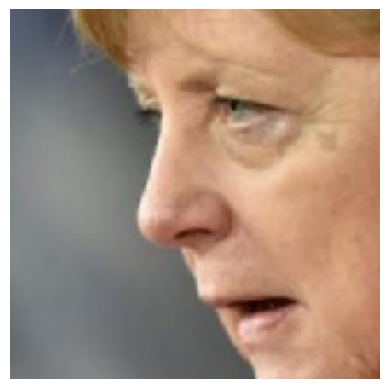

array([[9.8166013e-01, 4.2981401e-07, 2.0288564e-06, 3.7241723e-08,
        2.3597099e-07, 2.2371998e-04, 2.8918098e-06, 1.4127056e-07,
        4.6139013e-09, 7.0485692e-07, 6.4427348e-09, 1.5203915e-04,
        6.4104298e-11, 6.5332088e-08, 9.8038306e-03, 1.0196596e-08,
        3.2806367e-04, 1.8633572e-06, 3.3843375e-09, 4.3529584e-09,
        8.1775015e-06, 1.4219265e-09, 1.2279698e-09, 9.5912045e-10,
        1.5733133e-06, 6.2677199e-03, 8.4875779e-08, 4.3168927e-07,
        5.3564083e-08, 6.0105687e-10, 4.7049917e-07, 1.6358744e-10,
        2.7469124e-08, 7.3213317e-07, 8.1800820e-08, 4.8680043e-08,
        1.1548385e-06, 9.2618080e-08, 6.1213450e-07, 2.8065132e-08,
        2.9609814e-07, 3.4444277e-08, 5.3595357e-08, 6.8713329e-10,
        1.4295591e-06, 3.1035643e-09, 2.8087113e-06, 2.1127362e-09,
        8.1851974e-09, 1.2459245e-03, 3.1820147e-07, 2.4574056e-05,
        2.2234497e-07, 1.6382803e-08, 3.1517347e-09, 1.2813961e-04,
        1.3867185e-04]], dtype=float32)

In [53]:

from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

img_path = ("/tf/src/imagesV2/AngelaMerkel/crop/208_f68dc61e.jpg")
#img_path1 = ("/tf/src/imagesV2/AngelaMerkel/images/020_1081558b.jpg")

img = image.load_img(img_path, target_size=(160, 160))
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

plt.imshow(img_tensor[0])                           
plt.axis('off')
plt.show()

model.predict(img_tensor)


In [99]:
# Modify 'test1.jpg' and 'test2.jpg' to the images you want to predict on

from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 320, 240

# predicting images
img = image.load_img(img_path, target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print( classes)

# predicting multiple images at once
img = image.load_img(img_path1, target_size=(img_width, img_height))
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)

# pass the list of multiple images np.vstack()
images = np.vstack([x, y])
classes = model.predict(images, batch_size=10)

# print the classes, the images belong to
print(classes)
print("################")
print(classes[0])
print("################")
print(classes[0][0])

[[7.8614719e-02 3.0716665e-03 1.3464162e-04 6.1391603e-02 1.0740819e-03
  2.5264805e-03 2.4355503e-03 2.3148009e-03 5.8368258e-03 5.3229049e-04
  6.5882044e-04 7.5056439e-04 5.1975349e-04 1.3345250e-04 1.7097190e-03
  1.4481526e-03 3.2012081e-01 7.3439971e-04 8.5620441e-06 6.5251224e-05
  1.5624959e-04 3.5229513e-01 3.0477528e-02 1.9466655e-02 8.5100373e-03
  1.2048504e-03 2.0910611e-03 2.2441587e-04 2.1017782e-04 1.2921351e-03
  2.9334094e-04 8.4119922e-05 1.5549312e-03 4.4763103e-02 1.5245200e-04
  2.9038484e-03 7.7017727e-03 6.7930983e-04 1.2398083e-02 5.3978543e-05
  8.8100365e-05 5.1410282e-03 8.3292834e-04 2.3580778e-05 1.6640433e-05
  9.1232862e-03 1.6909197e-04 2.1196267e-04 1.3231285e-04 2.8451732e-03
  1.6754391e-04 2.0411825e-03 5.7477038e-04 3.6613405e-05 2.7043144e-03
  5.2961824e-03]]
[[7.8783706e-02 3.0925244e-03 1.3508736e-04 6.1708618e-02 1.0787543e-03
  2.5431241e-03 2.4454622e-03 2.3204121e-03 5.8618905e-03 5.3575903e-04
  6.6106196e-04 7.5358688e-04 5.2175799e-04 1.

In [52]:
import numpy as np
from keras.preprocessing import image

img_path = ("/tf/src/imagesV2/AngelaMerkel/crop/192_b175b5c4.jpg")

img_width, img_height = 150, 150
img = image.load_img(img_path, target_size = (img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

pred = model.predict(img)
print(pred)
print(labels)

maxP = np.argmax(pred)
print(maxP)

ValueError: in user code:

    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 160, 160, 3), found shape=(None, 150, 150, 3)


In [ ]:
####################################################

In [116]:
import os
import ffmpeg
import numpy as np
path = os.getcwd()
abspath = os.path.abspath(os.path.join(path, os.pardir))

inputPath = f'{abspath}/ffmpegTest/'
print(inputPath)

#in_filename = inputPath + 'merkel2.mp4'
#out_filename = f'{inputPath}videoTest.mp4'
in_filename = f'{abspath}/ffmpegTest/mexiko.mp4'
out_filename = f'{abspath}/ffmpegTest/mexiko3.mp4'
audio_out_filename = f'{abspath}/ffmpegTest/mexiko3Audio.mp4'
complete_filename = f'{abspath}/ffmpegTest/mexiko3Complete.mp4'

out_path = inputPath + 'frames/'
overlay_filename = inputPath + 'pic.png'

/tf/src/ffmpegTest/


In [80]:
probe = ffmpeg.probe(in_filename)
height = probe['streams'][0]['height']
width = probe['streams'][0]['width']

In [67]:
try:
    (ffmpeg.input(in_filename)
          .filter('fps', fps=60)
          .output(f'{out_path}/%d.png', 
                  video_bitrate='5000k',
                  s=f'{width}x{height}',
                  sws_flags='bilinear',
                  start_number=0)
          .run(capture_stdout=True, capture_stderr=True))
except ffmpeg.Error as e:
    print('stdout:', e.stdout.decode('utf8'))
    print('stderr:', e.stderr.decode('utf8'))

In [8]:
framePath = inputPath + 'frames/'
frameOutput = inputPath + 'framesOutput/'

In [81]:
from tensorflow import keras
model = keras.models.load_model(f'{abspath}/models/maskModel/masknet.h5')
classifier = keras.models.load_model(f'{abspath}/models/classification/newClass/v3/')

In [69]:
#loading haarcascade_frontalface_default.xml
face_model = cv2.CascadeClassifier(f'{abspath}/odm_MASKS/input/haarcascades/haarcascade_frontalface_default.xml')

In [70]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

In [71]:
# todo labels inject into model
import os

text_file = open("./assets/list_promis.txt", "r")
query_array = text_file.read().split(',\n')
query_array.append("Unknown")
query_array = sorted(query_array)
print(query_array)

['AngelaMerkel', 'AnnalenaBaerbock', 'AnthonyFauci', 'ArnoldSchwarzenegger', 'BarackObama', 'BenedictCumberbatch', 'BradPitt', 'ChadwickBoseman', 'ChrisHemsworth', 'ChrisPratt', 'ChristianBale', 'ChristianLindner', 'CristianoRonaldo', 'DenzelWashington', 'DonaldTrump', 'DwayneJohnson', 'EdSheeran', 'ElonMusk', "ElyasM'barek", 'GeorgeClooney', 'GüntherJauch', 'HeidiKlum', 'HeleneFischer', 'JasonMomoa', 'JeffBezos', 'JoeBiden', 'JudithRakers', 'KarlLauterbach', 'KobeBryant', 'LeBronJames', 'LeonardoDiCaprio', 'LewisHamilton', 'LionelMessi', 'MacKenzieScott', 'ManuelNeuer', 'MaxVerstappen', 'MichaelJackson', 'MichaelJordan', 'MorganFreeman', 'NovakDjokovic', 'OlafScholz', 'RafaelNadal', 'RobertDowneyJr', 'RogerFederer', 'SebastianVettel', "ShaquilleO'Neal", 'StefanRaab', 'SylvesterStallone', 'TomCruise', 'TomHanks', 'TomHardy', 'TomHiddleston', 'Unknown', 'VinDiesel', 'WillSmith', 'WladimirPutin', 'XiJinping']


In [31]:
frames = [f for f in os.listdir(framePath)]

from natsort import natsorted

for frame in natsorted(frames):
    print(frame)
    try:
        img = cv2.imread(framePath + frame)
        imgGrey = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
            
        faces = face_model.detectMultiScale(imgGrey, scaleFactor=1.1, minNeighbors=20)
        
        #print(faces)
        
        
        new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
                        
        for i in range(len(faces)):
            (x,y,w,h) = faces[i]
            crop = new_img[y:y+h,x:x+w]
            crop = cv2.resize(crop,(128,128))
            crop2 = new_img[y:y+h,x:x+w]
            crop2 = cv2.resize(crop2,(160,160))
            crop = np.reshape(crop,[1,128,128,3])/255.0
            crop2 = np.reshape(crop2,[1,160,160,3])/255.0
            mask_result = model.predict(crop)

            if mask_label[mask_result.argmax()] == "MASK":
                cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,2)
                cv2.rectangle(new_img,(x,y),(x+w,y+h),1)
            if mask_label[mask_result.argmax()] == "NO MASK":
                # klassifizierer
                y_prob = classifier.predict(crop2) 
                y_classes = y_prob.argmax(axis=-1)
                label = query_array[y_classes[0]]
                cv2.putText(new_img,label,(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,2)
                cv2.rectangle(new_img,(x,y),(x+w,y+h),1)
        
        cv2.imwrite(frameOutput + frame, cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR))   #whole frame with every rect
    except ValueError:
        print(ValueError)
        print(framePath + frame)

0.png
1.png
2.png
3.png
4.png
5.png
6.png
7.png
8.png
9.png
10.png
11.png
12.png
13.png
14.png
15.png
16.png
17.png
18.png
19.png
20.png
21.png
22.png
23.png
24.png
25.png
26.png
27.png
28.png
29.png
30.png
31.png
32.png
33.png
34.png
35.png
36.png
37.png
38.png
39.png
40.png
41.png
42.png
43.png
44.png
45.png
46.png
47.png
48.png
49.png
50.png
51.png
52.png
53.png
54.png
55.png
56.png
57.png
58.png
59.png
60.png
61.png
62.png
63.png
64.png
65.png
66.png
67.png
68.png
69.png
70.png
71.png
72.png
73.png
74.png
75.png
76.png
77.png
78.png
79.png
80.png
81.png
82.png
83.png
84.png
85.png
86.png
87.png
88.png
89.png
90.png
91.png
92.png
93.png
94.png
95.png
96.png


KeyboardInterrupt: 

In [108]:
def detect(in_frame):
    try:
        img = in_frame
        imgGrey = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
            
        faces = face_model.detectMultiScale(imgGrey, scaleFactor=1.1, minNeighbors=8)
        
        new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
        
        #print(faces)
                        
        for i in range(len(faces)):
            (x,y,w,h) = faces[i]
            crop = new_img[y:y+h,x:x+w]
            crop = cv2.resize(crop,(128,128))
            crop2 = new_img[y:y+h,x:x+w]
            crop2 = cv2.resize(crop2,(160,160))
            crop = np.reshape(crop,[1,128,128,3])/255.0
            crop2 = np.reshape(crop2,[1,160,160,3])/255.0
            
            mask_result = model.predict(crop)

            if mask_label[mask_result.argmax()] == "MASK":
                cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,2)
                cv2.rectangle(new_img,(x,y),(x+w,y+h),1)
            if mask_label[mask_result.argmax()] == "NO MASK":
                # klassifizierer
                y_prob = classifier.predict(crop2) 
                y_classes = y_prob.argmax(axis=-1)
                label = query_array[y_classes[0]]
                cv2.putText(new_img,label,(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,2)
                cv2.rectangle(new_img,(x,y),(x+w,y+h),1)
        
        return cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)
        
    except ValueError:
        print(ValueError)
        print(framePath + frame)

In [109]:
probe = ffmpeg.probe(in_filename)
height = probe['streams'][0]['height']
width = probe['streams'][0]['width']
nb_frames = probe['streams'][0]['nb_frames']

In [115]:
from ffmpeg import Error
try:
    out, err = (
                ffmpeg
                .input(in_filename)
                .output(audio_out_filename, format='f32le', acodec='pcm_f32le', ac=1, ar='44100')
                .run(capture_stdout=True, capture_stderr=True)
                )
except Error as err:
    print(err.stderr)
    raise
        

In [124]:
def analyse(in_filename, out_filename):
    process1 = (
    ffmpeg
    .input(in_filename)
    .output('pipe:', format='rawvideo', pix_fmt='rgb24', vframes=nb_frames)
    .run_async(pipe_stdout=True)
    )

    process2 = (
    ffmpeg
    .input('pipe:', format='rawvideo', pix_fmt='rgb24', s='{}x{}'.format(width, height))
    .output(out_filename, pix_fmt='yuv420p')
    .overwrite_output()
    .run_async(pipe_stdin=True)
    )

    while True:
        in_bytes = process1.stdout.read(width * height * 3)
        if not in_bytes:
            break
        in_frame = (
            np
            .frombuffer(in_bytes, np.uint8)
            .reshape([height, width, 3])
        )

        # See examples/tensorflow_stream.py:
        out_frame = detect(in_frame)

        process2.stdin.write(
            out_frame
            .astype(np.uint8)
            .tobytes()
        )

    process2.stdin.close()
    process1.wait()
    process2.wait()

In [121]:
v = ffmpeg.input(out_filename)
a = ffmpeg.input(audio_out_filename)

(
    ffmpeg
    .concat(v,a, v=1, a=1)
    .output(complete_filename)
    .run()
)

Error: ffmpeg error (see stderr output for detail)

In [ ]:
analyse(in_filename, out_filename)